In [ ]:
import pandas as pd
import streamlit as st

data = pd.read_csv('../data/processed/pathologie_clean.csv',sep=",")
data

,annee,dept,libelle_classe_age,patho_niv1,Npop,Ntop,prev_calculee
0,2015,9,de 0 à 4 ans,Affections de longue durée (dont 31 et 32) pou...,13610,120.0,0.88
1,2015,9,de 0 à 4 ans,Hospitalisations hors pathologies repérées (av...,13610,3460.0,25.42
2,2015,9,de 0 à 4 ans,Maladies cardioneurovasculaires,20410,80.0,0.39
3,2015,9,de 0 à 4 ans,Maladies inflammatoires ou rares ou infection VIH,20400,40.0,0.20
4,2015,9,de 0 à 4 ans,Maladies neurologiques,23890,90.0,0.38
...,...,...,...,...,...,...,...
33959,2023,82,tous âges,Maladies respiratoires chroniques (hors mucovi...,533780,35900.0,6.73
33960,2023,82,tous âges,Maternité (avec ou sans pathologies),274820,8060.0,2.93
33961,2023,82,tous âges,Traitements antalgiques ou anti-inflammatoires...,533780,8040.0,1.51
33962,2023,82,tous âges,Traitements du risque vasculaire (hors patholo...,1601340,159500.0,9.96


In [ ]:
data['patho_niv1'].unique()

array(["Affections de longue durée (dont 31 et 32) pour d'autres causes",
       'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)',
       'Maladies cardioneurovasculaires',
       'Maladies inflammatoires ou rares ou infection VIH',
       'Maladies neurologiques', 'Maladies psychiatriques',
       'Maladies respiratoires chroniques (hors mucoviscidose)',
       'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
       'Cancers', 'Diabète',
       'Traitements psychotropes (hors pathologies)',
       'Maladies du foie ou du pancréas (hors mucoviscidose)',
       'Maternité (avec ou sans pathologies)',
       'Traitements du risque vasculaire (hors pathologies)',
       'Insuffisance rénale chronique terminale',
       'Hospitalisation pour Covid-19'], dtype=object)

In [ ]:
# Filtrer pour ne garder que la population globale
df_tous_ages = data[data['libelle_classe_age'] == 'tous âges']

# Vérification : afficher les premières lignes
print(df_tous_ages[['patho_niv1', 'libelle_classe_age', 'prev_calculee']].head())

                                            patho_niv1 libelle_classe_age  \
264  Affections de longue durée (dont 31 et 32) pou...          tous âges   
265                                            Cancers          tous âges   
266                                            Diabète          tous âges   
267  Hospitalisations hors pathologies repérées (av...          tous âges   
268            Insuffisance rénale chronique terminale          tous âges   

     prev_calculee  
264           2.69  
265           1.24  
266           6.09  
267          15.14  
268           0.08  


In [ ]:
####vsiualisation des pathologies existantes et leur  prevalence dans le dept 31
import matplotlib.pyplot as plt
import seaborn as sns
import re
hors_patho = ["Affections de longue durée (dont 31 et 32) pour d'autres causes",
                'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)',
                'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
                'Traitements psychotropes (hors pathologies)','Traitements du risque vasculaire (hors pathologies)',
                'Hospitalisation pour Covid-19','Maternité (avec ou sans pathologies)']
# Filtrage de base pour le 31 et hors_patho
data_patho = data[~data['patho_niv1'].str.contains('|'.join(re.escape(x) for x in hors_patho), case=False, na=False, regex=True)]

# Filtrer pour le département 31, l'année 2023 et la population globale
df_31_2023 = data_patho[(data_patho['dept'] == 31) & 
                (data_patho['annee'] == 2023)]
# 2. Exclure 'tous âges' pour ne pas fausser la comparaison entre les tranches spécifiques
df_respi_ages = df_31_2023[df_31_2023['libelle_classe_age'] != 'tous âges'].copy()

# Trier par prévalence pour un meilleur rendu visuel
df_31_2023 = df_respi_ages.sort_values(by='prev_calculee',ascending=False)


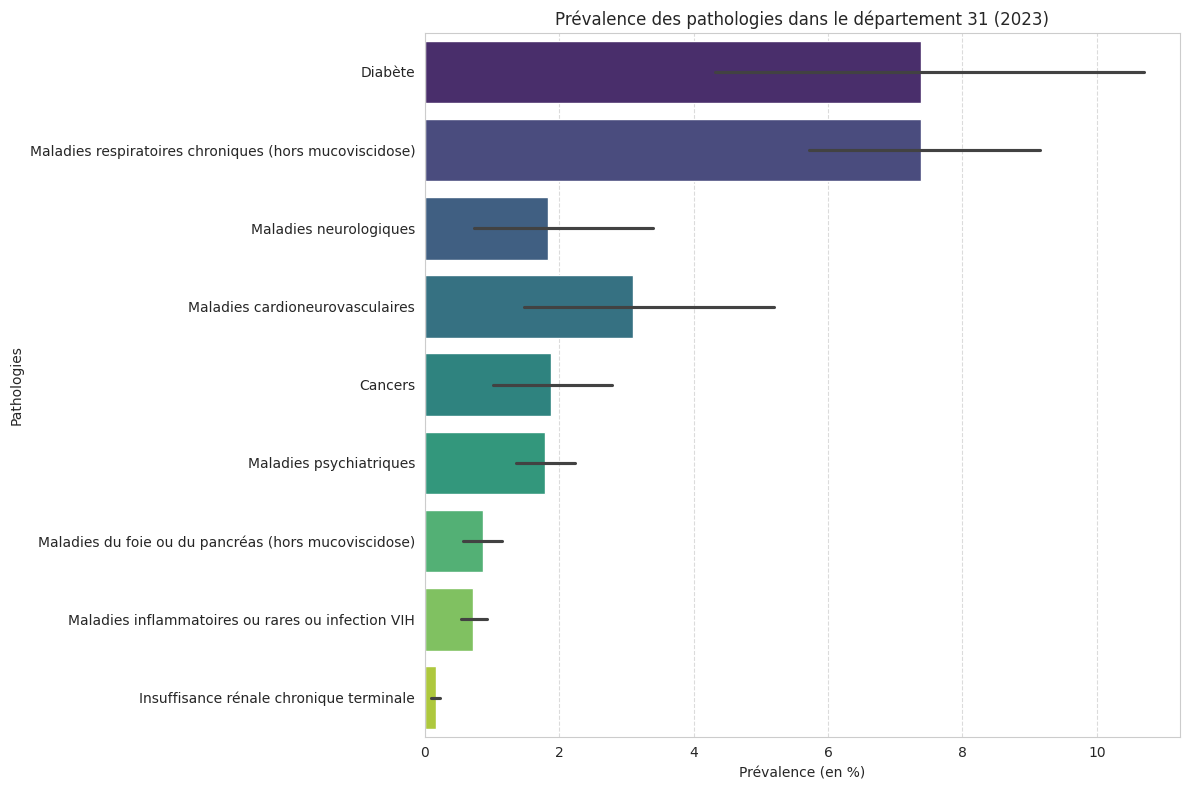

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_31_2023, 
            x='prev_calculee', 
            y='patho_niv1', 
            hue='patho_niv1',
            palette='viridis')

plt.title('Prévalence des pathologies dans le département 31 (2023)')
plt.xlabel('Prévalence (en %)')
plt.ylabel('Pathologies')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipykernel_113712/4261356563.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


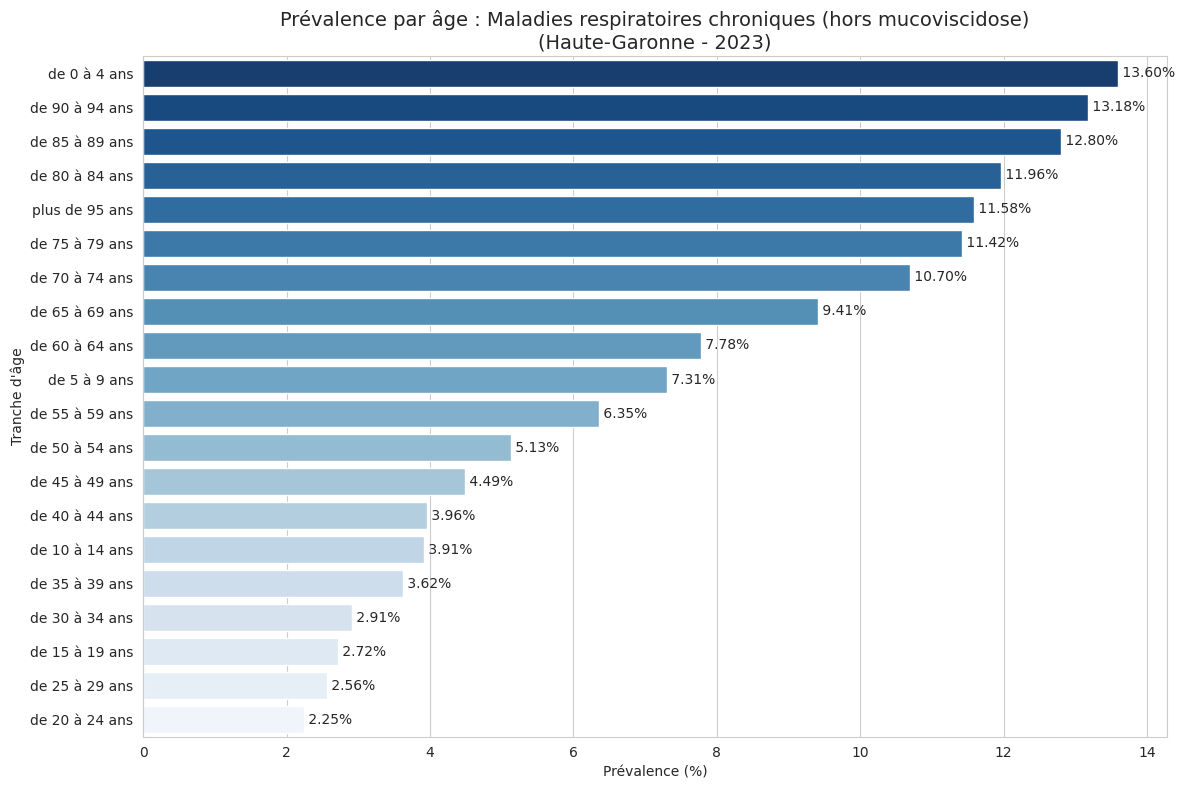

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
######visualiser les tranches d'ages des personnes plus vulnerables face aux maladies respiratoires 
# 1. Filtrer pour l'année 2023, le département 31 et la pathologie spécifique
# Note : Vérifiez bien que le nom correspond exactement à celui de votre colonne 'patho_niv1'
patho_cible = "Maladies respiratoires chroniques (hors mucoviscidose)"

df_respi_2023 = data_patho[
    (data_patho['annee'] == 2023) & 
    (data_patho['dept'] == 31) & 
    (data_patho['patho_niv1'].str.contains('respiratoires chroniques', case=False, na=False))
]

# 2. Exclure 'tous âges' pour ne pas fausser la comparaison entre les tranches spécifiques
df_respi_ages = df_respi_2023[df_respi_2023['libelle_classe_age'] != 'tous âges'].copy()

# 3. Trier les données par prévalence décroissante
df_respi_ages = df_respi_ages.sort_values(by='prev_calculee', ascending=False)

# 4. Visualisation
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.barplot(
    data=df_respi_ages, 
    x='prev_calculee', 
    y='libelle_classe_age', 
    palette='Blues_r'
)

# Ajout des étiquettes de données pour plus de précision
for i, val in enumerate(df_respi_ages['prev_calculee']):
    plt.text(val, i, f' {val:.2f}%', va='center', fontsize=10)

plt.title(f'Prévalence par âge : {patho_cible}\n(Haute-Garonne - 2023)', fontsize=14)
plt.xlabel('Prévalence (%)')
plt.ylabel('Tranche d\'âge')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
###Etude de l'evolution
# Liste des mots-clés à exclure 
hors_patho = ["Affections de longue durée (dont 31 et 32) pour d'autres causes",
                'Hospitalisations hors pathologies repérées (avec ou sans pathologies, traitements ou maternité)',
                'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
                'Traitements psychotropes (hors pathologies)','Traitements du risque vasculaire (hors pathologies)',
                'Hospitalisation pour Covid-19','Maternité (avec ou sans pathologies)']

# Filtrage de base pour le 31 et hors_patho
data_patho = data[~data['patho_niv1'].str.contains('|'.join(re.escape(x) for x in hors_patho), case=False, na=False, regex=True)]

# Top 5 pour 2023 (en prenant la moyenne sur les âges pour classer)
top_5_names = (data_patho[data_patho['annee'] == 2023]
               .groupby('patho_niv1')['prev_calculee']
               .mean()
               .sort_values(ascending=False)
               .head(5).index)

# On ne garde que ces 5 pathologies pour la suite
df_top5_31 = data_patho[data_patho['patho_niv1'].isin(top_5_names)]

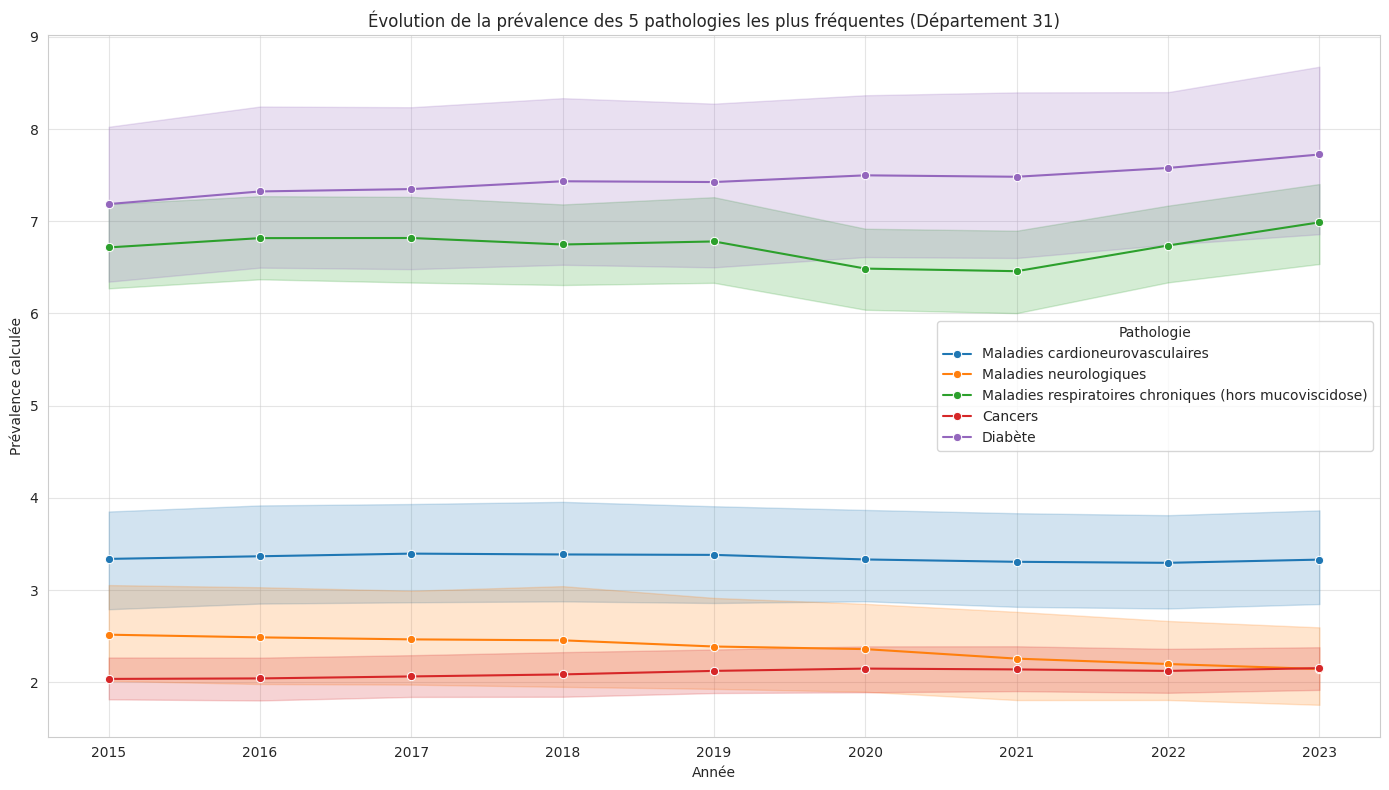

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(
    data=df_top5_31,
    x="annee",
    y="prev_calculee",
    hue="patho_niv1",
    marker="o"
)

plt.title("Évolution de la prévalence des 5 pathologies les plus fréquentes (Département 31)")
plt.xlabel("Année")
plt.ylabel("Prévalence calculée")
plt.legend(title="Pathologie")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()
